# 결정 트리

- 트리는 분류(classification)와 회귀에 모두 사용된다
- 랜덤 포레스트는 결정트리의 성능을 향상

- 성별을 분류하는 예측모델

# 데이터
## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({'font.size': 15})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier

## 데이터 읽기

In [3]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## 전처리

In [4]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


## 데이터 나누기
- 성별  예측
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [5]:
# 스케일링을 하지 않는다
X = data[["Height", "Weight"]]
y = data.Gender

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7500, 2), (2500, 2), (7500,), (2500,))

# 모델: 결정 트리

In [7]:
model = DecisionTreeClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 학습

DecisionTreeClassifier()

In [8]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [9]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1075  160]
 [ 151 1114]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1235
           1       0.87      0.88      0.88      1265

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [10]:
proba_1 = model.predict_proba(X_test)[:,1]
proba_1

array([0., 1., 0., ..., 0., 0., 0.])

## Precisio-Recall 선택하기

In [11]:
y_pred_5 = (proba_1 > 0.5)*1
show_clf_result(y_test, y_pred_5)

[[1075  160]
 [ 151 1114]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1235
           1       0.87      0.88      0.88      1265

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [12]:
y_pred_8 = (proba_1 > 0.8)*1
show_clf_result(y_test, y_pred_8)

[[1075  160]
 [ 151 1114]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1235
           1       0.87      0.88      0.88      1265

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [13]:
y_pred_3 = (proba_1 > 0.3)*1
show_clf_result(y_test, y_pred_3)

[[1075  160]
 [ 151 1114]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1235
           1       0.87      0.88      0.88      1265

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



## 트리 구조 보기

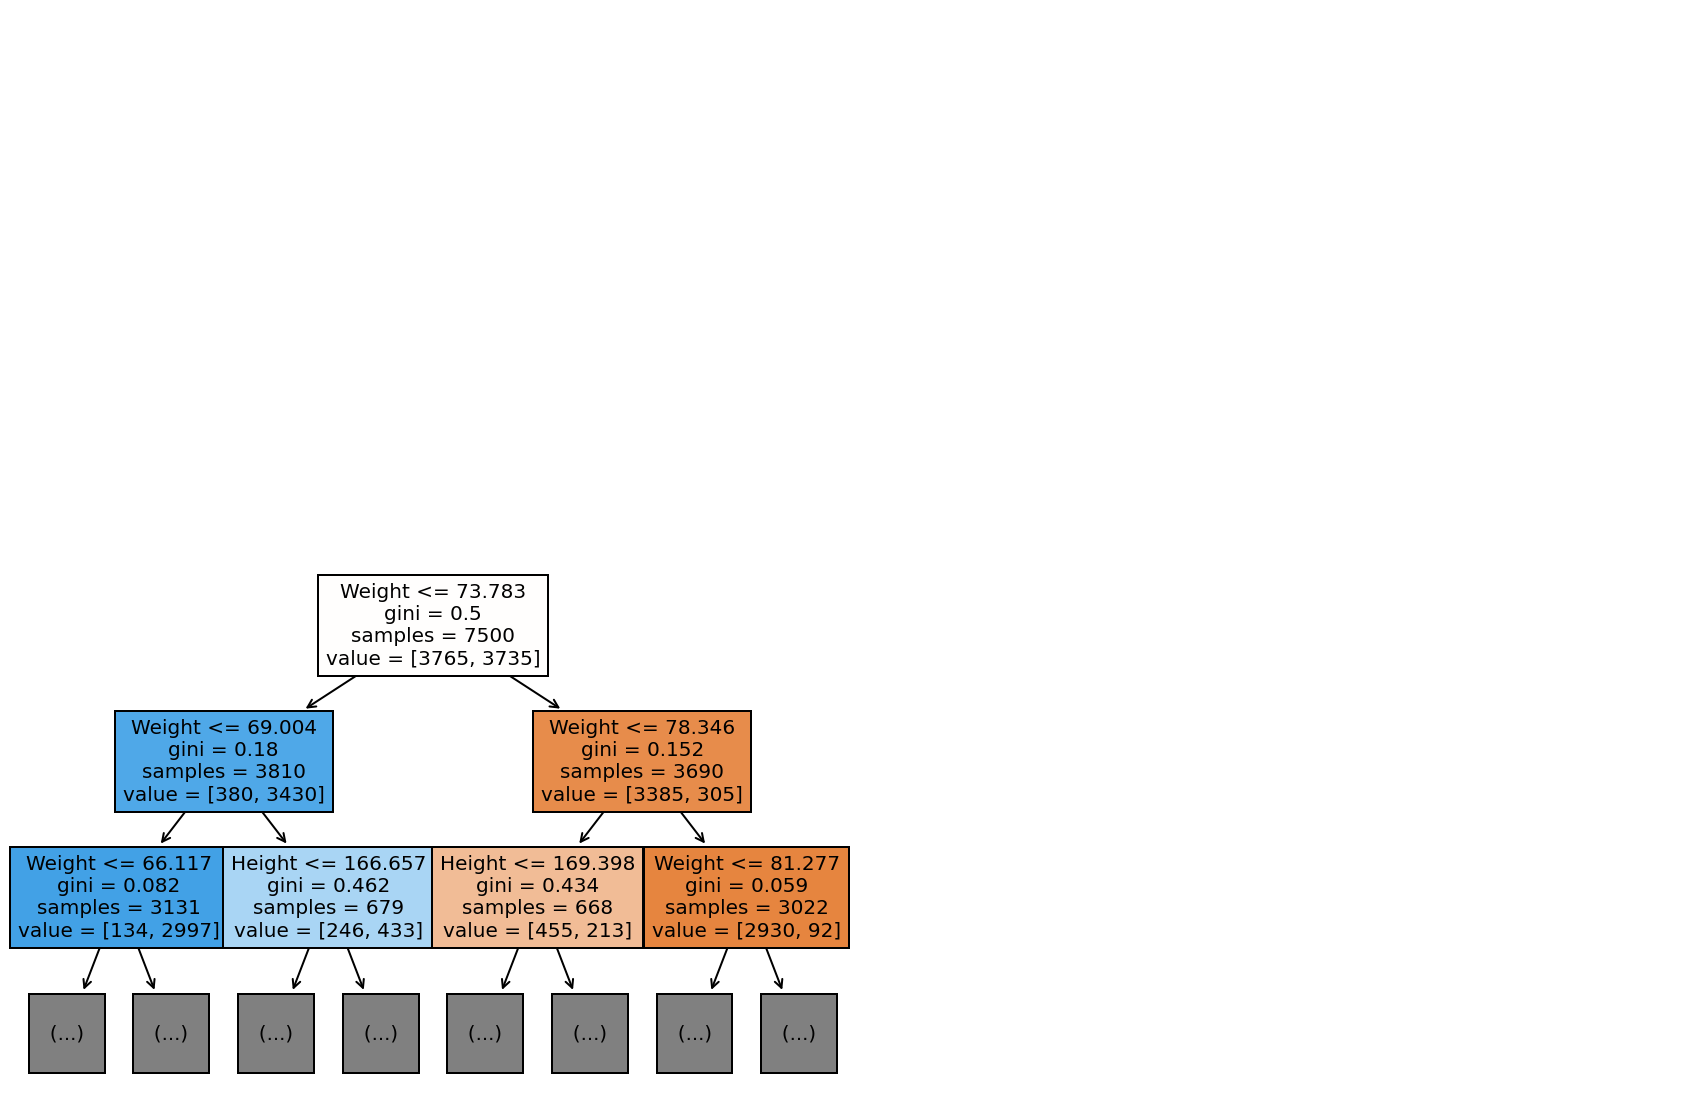

In [14]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(15,10))
plt.rcParams["figure.dpi"] = 200

tree.plot_tree(model, fontsize=10,
              feature_names=["Height", "Weight"],
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

## 트리 동작 내용

In [15]:
print(tree.export_text(model))

|--- feature_1 <= 73.78
|   |--- feature_1 <= 69.00
|   |   |--- feature_1 <= 66.12
|   |   |   |--- feature_1 <= 61.31
|   |   |   |   |--- feature_1 <= 58.37
|   |   |   |   |   |--- feature_1 <= 51.21
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  51.21
|   |   |   |   |   |   |--- feature_1 <= 51.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  51.21
|   |   |   |   |   |   |   |--- feature_1 <= 56.08
|   |   |   |   |   |   |   |   |--- feature_1 <= 56.08
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 56.03
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 152.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  152.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_1 >  56.03
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 56.04


## 엔트로피

- 확률 p인 사건의 가치:  $log$(${1}\over{p}$) 
- 엔트로피=확률x기대치: $Entropy(H)$ = $p$ $log$(${1}\over{p}$)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.32.23.png?raw=1" align='left'  width=200>


## 크로스 엔트로피 

- 참고: 분류 모델의 손실함수, 즉 학습을 하면서 줄여야 할 대상 값은 크로스 엔트로피를 사용한다
- 분류가 잘 수행될수록 (즉, 분류된 하위 그룹의 p가 1 또는 0으로 수렴할수록) 크로스 엔트로피의 합은 점차 줄어들며 이를 분류의 손실함수로 사용한다
- 계산량을 줄이기 위해서 gini 계수를 사용하기도 한다 (디폴트 값)

<img  src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.11.png?raw=1" align='left'  width=400>

- 엔트로피: 

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.29.58.png?raw=1" align='left'  width=150>

- gini 계수:

$1 - \sum {p_{i}}^2$

## 특성 중요도
- 결정트리, 랜덤포레스트, 부스팅 등 트리계열 모델에서 모델의 동작에 기여한 특성별 점수를 알려준다 (합이 1이 되는 수치로 환산)

In [16]:
model.feature_importances_

array([0.14383698, 0.85616302])

In [17]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', 
                        color='b', figsize=(8,6))
    plt.gca().legend_ = None

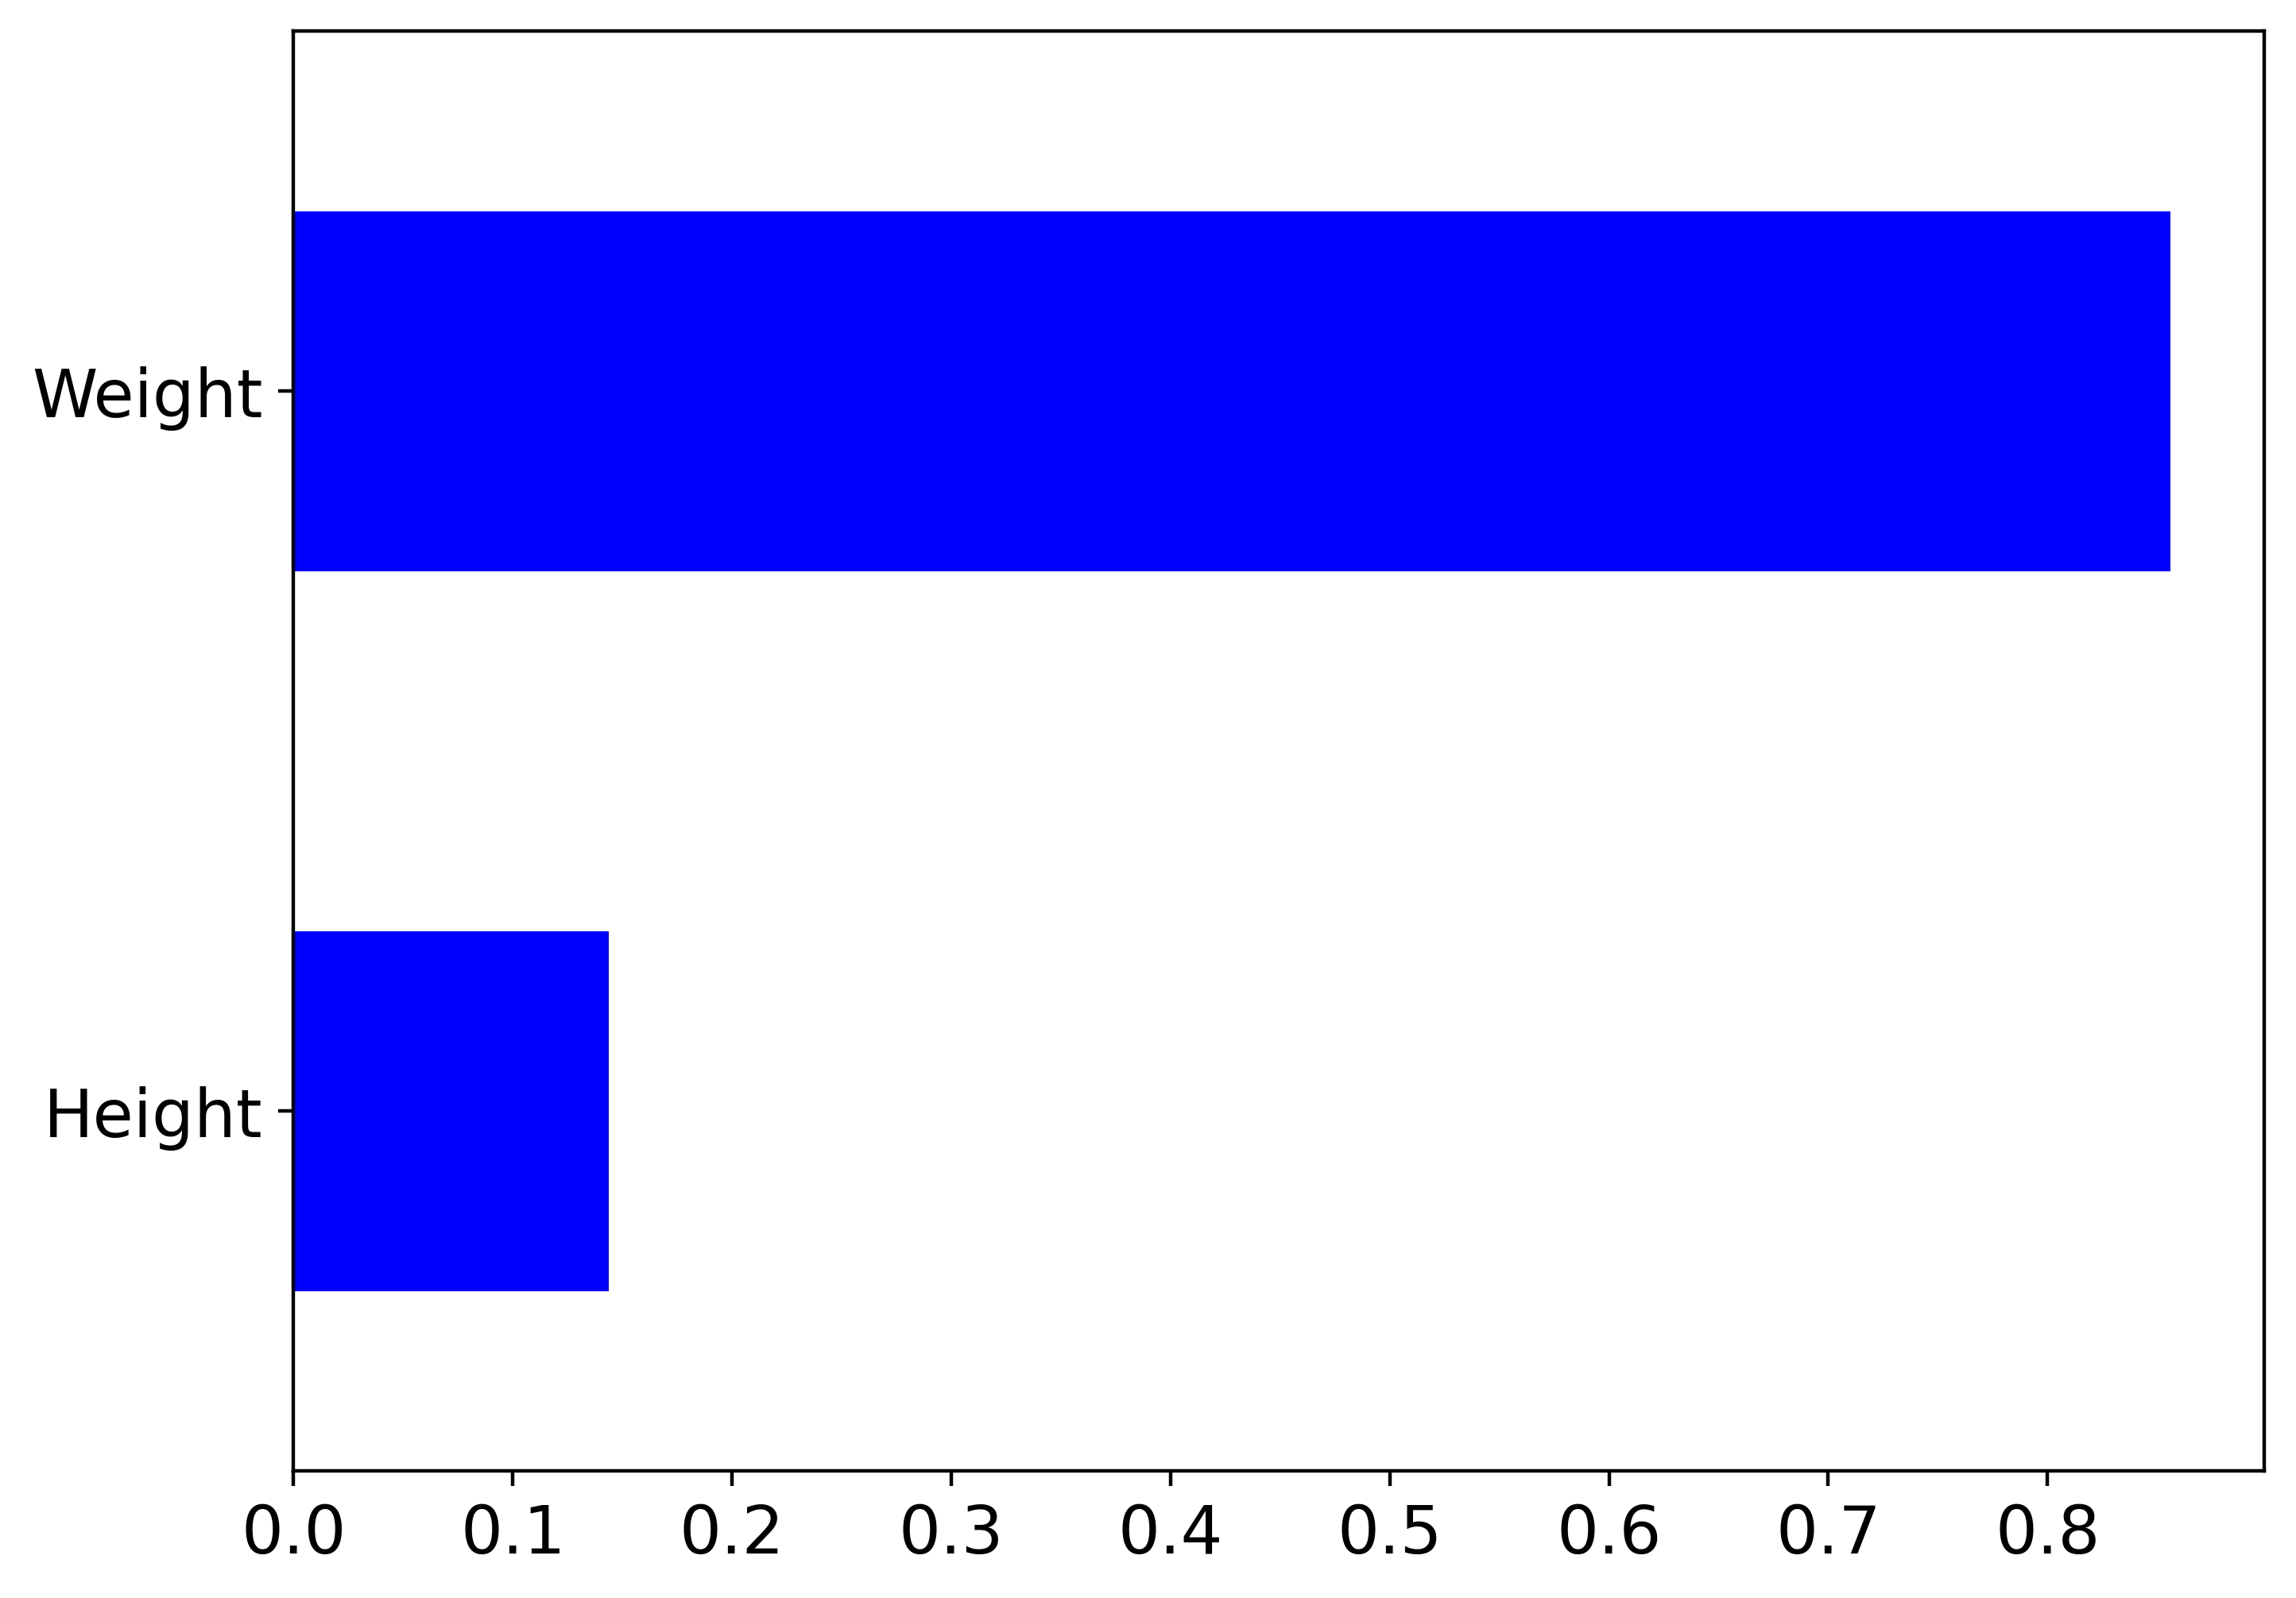

In [18]:
plot_features_weights(["Height", "Weight"], model.feature_importances_)

# 모델: 랜덤 포레스트

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1093  142]
 [ 105 1160]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1235
           1       0.89      0.92      0.90      1265

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



## 랜덤 포레스트 개념
- 결정 트리의 성능을 개선한 방법
- 간단한 구조의 결정 트리(weak learner)를 수십~수백개를 만들고 각 결정 트리의 동작 결과의 평균치를 구하는 방법
- 앙상블(ensemble) 방법이 하나의 모델만 만드는 것보다 좋은 성능을 보인다
- 각 결정 트리를 만들 때 훈련 데이터의 일부만 사용하거나 특성의 일부를 무작위로 선택하여 만든다 
- 앙상블의 갯수: n_estimators

- 랜덤 포레스트 개념

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.52.png?raw=1" align='left'  width=400>

- 소프트 투표

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.52.18.png?raw=1" align='left'  width=400>